In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from skimage.feature import peak_local_max

Lattice vectors and origin from data. user defined total number of repeatition along each vector

In [230]:
n1=50
n2=50
v1_ini = [1.93731, -0.66823]
v2_ini = [1.68536,1.35421]
ori=[0,0]

In [231]:
theta = np.radians(0)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

Generating x and y coordinates from index of each point

In [232]:
v1=R.dot(v1_ini)
v2=R.dot(v2_ini)

In [233]:
pt_index = np.array(np.meshgrid(np.arange(-n1,n1),np.arange(-n2,n2)))
x= pt_index[0,:,:]* v1[0]+ pt_index[1,:,:]* v2[0]+ori[1]
y= pt_index[0,:,:]* v1[1]+ pt_index[1,:,:]* v2[1]+ori[0]
z=np.ones_like(x)

Masking x and y values to get lattice in chosen x,y range

In [237]:
mask_x = np.logical_and(x > 0.2, x < 30.2)
mask_y = np.logical_and(y > 0.2, y < 30.2)
mask_z = ~np.logical_and(mask_x,mask_y)
z_masked=np.ma.masked_array(z, mask_z)

In [221]:
data=np.loadtxt('Data/18d03T0015.txt')
data_z=data*1e9

In [222]:
xy = peak_local_max(data_z, min_distance=3,threshold_abs=0.05)
from scipy.spatial import KDTree
tree=KDTree(xy)
dd,ii=tree.query(xy,k=2)

In [225]:
a,b=np.histogram(dd[:,1],bins=30)
b[np.where(a==max(a))]
#np.mean(b)

array([6.85727513])

<IPython.core.display.Javascript object>


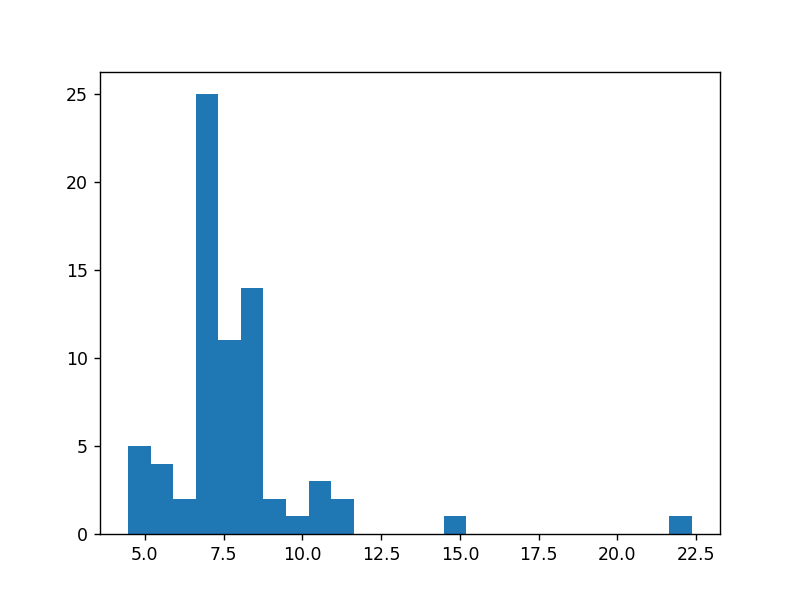

(array([ 5.,  4.,  2., 25., 11., 14.,  2.,  1.,  3.,  2.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 4.47213595,  5.18767771,  5.90321946,  6.61876121,  7.33430297,
         8.04984472,  8.76538647,  9.48092822, 10.19646998, 10.91201173,
        11.62755348, 12.34309524, 13.05863699, 13.77417874, 14.48972049,
        15.20526225, 15.920804  , 16.63634575, 17.35188751, 18.06742926,
        18.78297101, 19.49851276, 20.21405452, 20.92959627, 21.64513802,
        22.36067977]),
 <BarContainer object of 25 artists>)

In [224]:
plt.figure()
plt.hist(dd[:,1],bins=25)

<IPython.core.display.Javascript object>


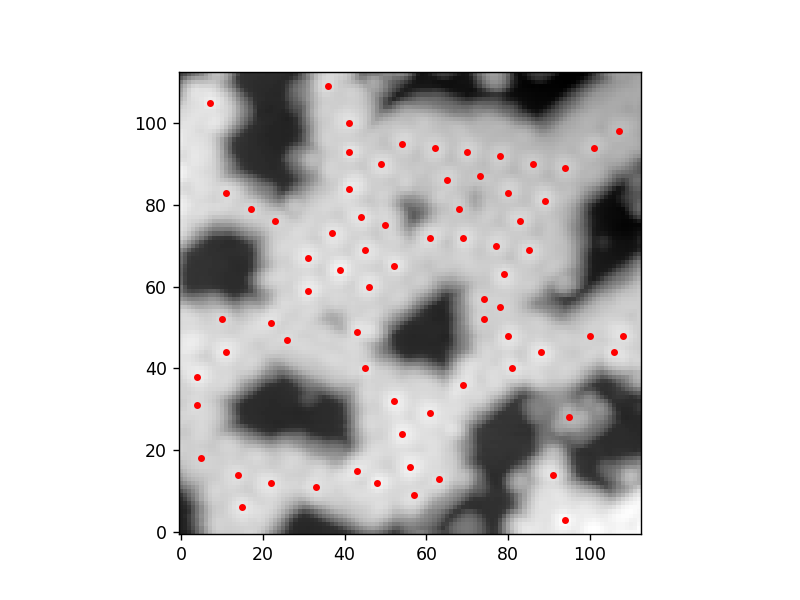

In [228]:
plt.figure()
plt.gca().set_aspect('equal')
plt.imshow(data_z,cmap=plt.cm.gray, origin='lower')
plt.plot(xy[:, 1], xy[:, 0], 'r.')
#plt.plot(nn[:, 1], nn[:, 0], 'b.')
#ax.scatter3D(x,y,z_masked*3,'.',s=2,color='black')
#plt.xlim(0,65)
#plt.ylim(0,65)

In [226]:
imsize=31.5
pxsize=imsize/data_z.shape[0]
data_x=np.linspace(0, imsize, num=data_z.shape[0])
data_y=data_x
X,Y=np.meshgrid(data_x,data_y)

In [227]:
pxsize*6.85727513

1.9115412973008847

<IPython.core.display.Javascript object>


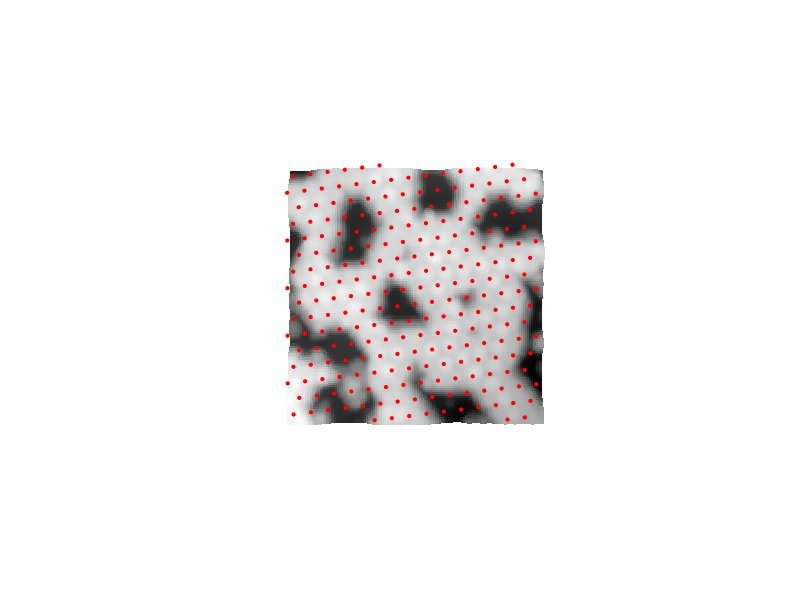

<ipython-input-239-7b7f2ea9c20c>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection="3d")


(-1.5750000000000002, 33.075, -1.5750000000000002, 33.075)

In [239]:
fig = plt.figure()
plt.gca().set_aspect('equal')
ax = plt.axes(projection="3d")
ax.plot_surface(X,Y,data_z,cmap=plt.cm.gray,linewidth=0, antialiased=False, rcount=200, ccount=200 )
ax.scatter3D(x,y,z_masked*3,'.',s=2,color='red')
#plt.plot(xy[:, 1], xy[:, 0], 'ro')
ax.view_init(90, 0)
#plt.xlim(0,5)
#plt.ylim(0,5)
plt.axis('off')

<IPython.core.display.Javascript object>


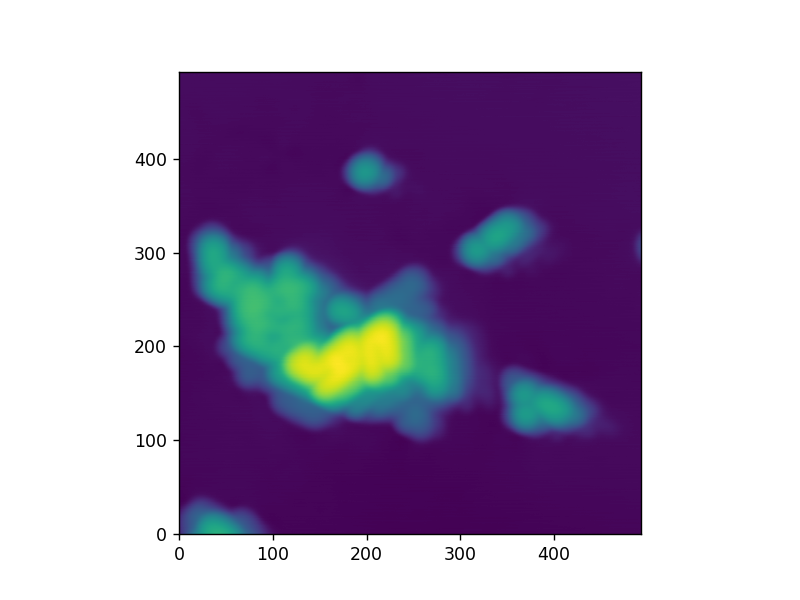

In [119]:
data=np.loadtxt('18h02T0002_25nm.txt')
data_z=data*1e9
plt.figure()
plt.imshow(data_z, origin='lower')

In [120]:
data_x=np.linspace(0, 25.0, num=data_z.shape[0])
data_y=data_x
X,Y=np.meshgrid(data_x,data_y)

In [229]:
fig = plt.figure()
plt.gca().set_aspect('equal')
ax = plt.axes(projection="3d")
ax.plot_surface(X,Y,data_z,cmap=plt.cm.viridis,linewidth=0, antialiased=False, rcount=200, ccount=200 )
ax.scatter3D(x,y,z_masked*3,'.',s=1,color='red')
ax.view_init(90, 0)
plt.xlim(5.2,15.8)
plt.ylim(5.2,15.8)

<IPython.core.display.Javascript object>

<ipython-input-229-941b1b9880a1>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection="3d")


ValueError: shape mismatch: objects cannot be broadcast to a single shape